In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import os
import itertools
import time
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import (CosineAnnealingLR,
                                      CosineAnnealingWarmRestarts,
                                      StepLR,
                                      ExponentialLR)

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, auc, f1_score, precision_score, recall_score

In [37]:
import tqdm, re, sys
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import plot_confusion_matrix
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint

In [38]:
data_train = pd.read_csv('/content/drive/MyDrive/project/model_line/high/train_high_line.csv', header=None)
data_test = pd.read_csv('/content/drive/MyDrive/project/model_line/high/valid_high_line.csv', header=None)
data_val= pd.read_csv('/content/drive/MyDrive/project/model_line/high/test_high_line.csv', header=None)

In [39]:
arr = np.array([])

for i in range(1,101):
  for j in range(240):
    arr = np.append(arr, np.array([i]))

In [40]:
arr_t = np.array([])

for i in range(1,101):
  for j in range(60):
    arr_t = np.append(arr_t, np.array([i]))

In [41]:
arr_v = np.array([])

for i in range(1,101):
  for j in range(60):
    arr_v = np.append(arr_v, np.array([i]))

In [42]:
data_train[256]=arr
data_test[256]=arr_t
data_val[256]=arr_v
data_val

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,0.004293,-0.108721,-0.025203,0.050075,0.041975,-0.079525,-0.019323,0.040809,0.003013,-0.044322,...,0.090296,-0.007490,-0.026310,0.053336,0.110380,0.044460,-0.027323,0.009700,0.105980,1.0
1,-0.178025,-0.129949,-0.154714,-0.190879,-0.147544,-0.149849,-0.139385,-0.184831,-0.160077,-0.125704,...,-0.192521,-0.104194,-0.074016,-0.121687,-0.121997,-0.143646,-0.113273,-0.137490,-0.137856,1.0
2,-0.118486,-0.135978,-0.021999,0.014580,-0.094641,-0.135181,-0.068231,0.024199,-0.080811,-0.151051,...,-0.057865,-0.169278,-0.139103,-0.051629,0.003184,-0.126743,-0.173762,-0.090042,-0.026942,1.0
3,0.595354,0.768205,0.751377,0.729010,0.837712,0.799024,0.553267,0.214589,0.034092,0.025435,...,-0.051033,0.071048,0.039479,-0.059981,-0.111832,0.002407,0.031495,-0.068237,-0.108500,1.0
4,-0.107180,-0.029394,-0.003439,-0.114145,-0.110911,-0.047808,0.014365,-0.074943,-0.107671,-0.060639,...,-0.173071,-0.158586,-0.065081,-0.066074,-0.202336,-0.198327,-0.087227,-0.061546,-0.158424,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,-0.006009,0.035463,0.031765,0.034116,0.041276,0.040276,0.043814,0.049392,0.014919,0.082215,...,0.025207,0.017123,-0.047797,-0.036055,-0.080359,-0.080849,-0.131536,-0.108450,-0.119801,100.0
5996,-0.004209,-0.021269,0.014421,0.066451,0.034102,0.022313,0.039954,0.015126,0.016828,0.095201,...,-0.007017,-0.001635,0.073427,0.119448,0.241599,0.262261,0.279691,0.237252,0.092732,100.0
5997,-0.052598,-0.055633,-0.055577,-0.032002,-0.095826,-0.056251,-0.088205,-0.003379,-0.041393,-0.062797,...,-0.060236,-0.027453,-0.048409,-0.078653,-0.040536,-0.018418,-0.062418,-0.006057,0.010865,100.0
5998,-0.039242,-0.044322,-0.024571,-0.017190,-0.044918,-0.038277,-0.066724,-0.033992,-0.049339,-0.018386,...,-0.019348,-0.078060,-0.082112,-0.081604,-0.070175,-0.080676,-0.072666,0.004694,-0.046835,100.0


In [43]:
y_train = to_categorical(data_train[256])
y_test = to_categorical(data_test[256])
y_val = to_categorical(data_val[256])
y_train[:241]

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [44]:
data_train.drop([256], axis=1, inplace=True)
data_test.drop([256], axis=1, inplace=True)
data_val.drop([256], axis=1, inplace=True)
data_train

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-0.011566,0.077466,0.083038,0.015121,-0.024216,0.026618,0.112943,0.067018,-0.022367,0.035899,...,0.010081,-0.080380,-0.088511,0.005901,-0.000657,-0.066214,-0.061900,-0.011674,0.064162,-0.020820
1,-0.105411,0.006199,0.035219,-0.038238,-0.087385,-0.047431,0.057264,0.011541,-0.063622,-0.054354,...,-0.014515,-0.102607,-0.121740,-0.038993,-0.017367,-0.083201,-0.108995,-0.055099,0.004076,-0.050829
2,-0.124635,-0.101820,-0.004986,-0.009573,-0.097080,-0.078287,-0.033934,0.011788,-0.100740,-0.105788,...,0.008528,-0.087241,-0.110820,-0.037730,0.000719,-0.066072,-0.119163,-0.068725,0.003512,-0.040881
3,-0.070665,-0.110059,-0.041584,0.011091,-0.073945,-0.116371,-0.065348,0.005895,-0.075523,-0.138241,...,-0.018326,-0.074093,-0.113909,-0.113364,-0.053677,-0.015389,-0.088530,-0.122749,-0.019986,-0.033522
4,0.164484,0.137004,0.165505,0.176745,0.186086,0.149056,0.190527,0.256168,0.278809,0.242770,...,0.165532,0.168813,0.158065,0.156737,0.236019,0.242662,0.237836,0.242839,0.272923,0.371568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,0.047641,0.025272,0.001593,0.008873,-0.022388,-0.055809,-0.067971,-0.044163,-0.045987,-0.032190,...,0.017286,-0.062754,0.002815,-0.032905,-0.016336,-0.045078,0.004621,-0.020431,0.005698,-0.048605
23996,-0.017653,0.005880,-0.008398,-0.053956,-0.045114,-0.050892,-0.014791,-0.025570,-0.044989,-0.027848,...,-0.058060,-0.017953,0.000676,0.008635,-0.010605,0.004606,0.032398,0.011841,-0.004365,0.032981
23997,0.020267,0.062224,-0.014968,0.012301,0.073691,0.025622,0.056645,0.040058,0.073452,0.061997,...,-0.039918,-0.057440,-0.065800,-0.044000,-0.082399,-0.083447,-0.065335,-0.088911,-0.080017,-0.076062
23998,-0.091136,-0.072359,-0.082491,-0.096773,-0.108624,-0.106044,-0.096813,-0.094621,-0.049099,-0.103425,...,-0.069209,-0.095215,-0.045811,-0.093347,-0.052513,-0.086620,-0.069087,-0.056044,-0.095822,-0.080069


In [45]:
X_train=data_train.values
X_test=data_test.values
X_val=data_val.values

In [46]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(24000, 256)
(6000, 256)
(6000, 256)
(24000, 101)
(6000, 101)
(6000, 101)


In [47]:
# X_train = X_train.reshape(1, 256, 24000)
# X_test = X_test.reshape(1, 256, 6000)
# X_val = X_val.reshape(1, 256, 6000)
X_train = X_train.reshape(24000, 256, 1)
X_test = X_test.reshape(6000, 256, 1)
X_val = X_val.reshape(6000, 256, 1)
X_train.shape, X_test.shape, X_val.shape

((24000, 256, 1), (6000, 256, 1), (6000, 256, 1))

In [48]:
from keras.layers import Input, Embedding, GRU, LSTM, SimpleRNN, MaxPooling1D, GlobalMaxPool1D, CuDNNGRU
from keras.layers import Dropout, Dense, Activation, Flatten, Conv1D, SpatialDropout1D
from keras.models import Sequential

model = Sequential()
model.add(SimpleRNN(units=100, return_sequences=True, input_shape=(256,1))) #shape[1]=열
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(SimpleRNN(units=100, return_sequences=True))
model.add(SimpleRNN(units=50, return_sequences=True))


model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(101, activation='softmax'))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 256, 100)          10200     
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 256, 50)           7550      
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 256, 100)          15100     
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 256, 50)           7550      
                                                                 
 flatten_2 (Flatten)         (None, 12800)             0         
                                                                 
 dropout_2 (Dropout)         (None, 12800)             0         
                                                                 
 dense_2 (Dense)             (None, 101)              

In [49]:
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 500, verbose = 1, validation_data=(X_val, y_val))

Epoch 1/500
24/24 [==============================] - 30s 1s/step - loss: 0.0099 - accuracy: 0.0113 - val_loss: 0.0098 - val_accuracy: 0.0155
Epoch 2/500
24/24 [==============================] - 26s 1s/step - loss: 0.0098 - accuracy: 0.0193 - val_loss: 0.0098 - val_accuracy: 0.0243
Epoch 3/500
24/24 [==============================] - 29s 1s/step - loss: 0.0098 - accuracy: 0.0286 - val_loss: 0.0098 - val_accuracy: 0.0365
Epoch 4/500
24/24 [==============================] - 26s 1s/step - loss: 0.0097 - accuracy: 0.0472 - val_loss: 0.0097 - val_accuracy: 0.0472
Epoch 5/500
24/24 [==============================] - 27s 1s/step - loss: 0.0097 - accuracy: 0.0570 - val_loss: 0.0098 - val_accuracy: 0.0270
Epoch 6/500
24/24 [==============================] - 27s 1s/step - loss: 0.0097 - accuracy: 0.0707 - val_loss: 0.0097 - val_accuracy: 0.0572
Epoch 7/500
24/24 [==============================] - 26s 1s/step - loss: 0.0095 - accuracy: 0.1214 - val_loss: 0.0098 - val_accuracy: 0.0750
Epoch 8/500
2

In [50]:
model.evaluate(X_test, y_test)

188/188 [==============================] - 15s 79ms/step - loss: 0.0030 - accuracy: 0.8293


[0.0029620020650327206, 0.8293333053588867]

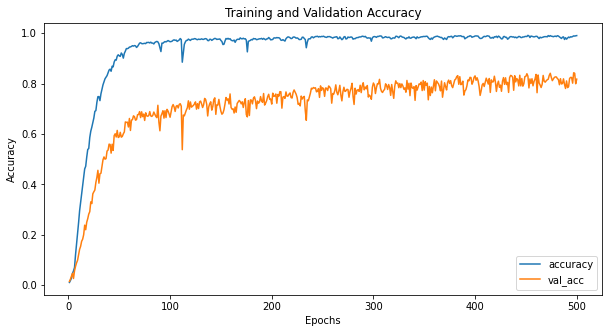

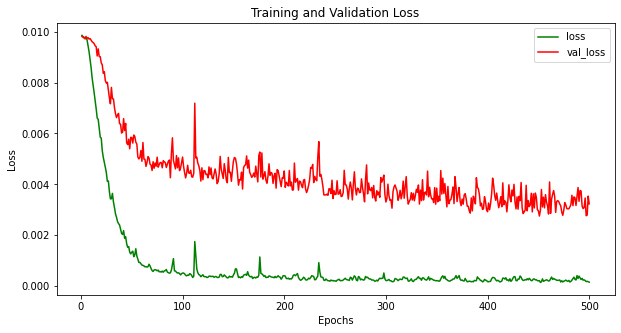

In [51]:
history=history.history
epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

plt.figure(figsize=(10, 5))
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

plt.figure(figsize=(10, 5))
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()

In [52]:
from tensorflow.python.keras.models import load_model
model.save('RNNhigh500.h5')

In [53]:
from google.colab import files
files.download('RNNhigh500.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>